# X Agency Case Study

Brand image is a key factor in many high-end or luxury leaning brands. Dilma's Socks is one of such growing companies, and should rightly be concerned about the manner that customers consider their image. As a result of a recent shipping mishap, there was a spike in call volumes. An investigation into this led to an unexpected conclusion: current call centre representatives may not be adequate purveyors of Dilma's brand image.

Given this, X Agency was given the task to improve the call centre service. Two solutions were offered:

1. Retrain the call centre representatives with a human-centric approach.
2. Improve brand image through incentivisation of a "Free Socks For Life" competition.

Survey data was collected for customers that spoke to a call centre agent of one of the two categories, or a call centre agent who engaged in both. Thus, we had four treatment groups:

1. Control Group
2. Human-Focused Group
3. Incentive Group
4. Interaction Group (Both 3 and 4)

Data was provided in .csv with 101 entries for the Control, Human Focused, and Incentive groups, and 81 entries for the Interaction group.

With this data, we aim to answer three questions:


1. Which approach (or combination) had the most positive impact on a customer’s perception of Dilma's Socks?
2. Which approach (or combination) had the most positive impact on a customer’s comprehension of Dilma's Socks’ products and services?
3. Which method (or combination) had the highest likelihood of customers recommending DS to their friends?

## Data Cleaning and Organisation

A large amount of survey data is often collected somewhat roughly. Fortunately, there are a number of tools that will allow us to process, organise, analyse, and visualise. We will be using Python, and will call upon libraries such as Pandas, SciPy, MatPlotLib, and Seaborn to perform the aforementioned.

Let's begin by importing the data and renaming the column titles to their corresponding question number as listed in the survey.

In [1]:
%matplotlib inline

import pandas as pd

survey = pd.read_csv('Question Materials/Mock Call Centre Data.csv')

survey.rename(columns={'Q11': 'Q2', 'Q35': 'Q3', 'Q17_1': 'Q5',
                   'Q19_1': 'Q6', 'Q21_1': 'Q7', 'Q12': 'Q8',
                   'Q5': 'Q11', 'Q36': 'Q13', 'Q38': 'Q14', 
                   'Q55': 'Q15', 'Q57': 'Q16', 'Q39': 'Q17', 'Q39.1': 'Q18'}, inplace=True)

Let's now remove some columns that won't be necessary for our analysis, in order to make dataframe processing a little more straightforward. We'll also remove the first and second rows as they offer nothing to our analysis and, in fact, clutter up our dataframe. We'll also reset the row indices to make things cleaner.

Then, we'll convert certain columns from strings to numbers in order to appropriately process the data. We'll also need to convert the "Yes" and "No" responses in Q8 into binomial data that we can work with.

In [2]:
columns = ['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Finished', 'RecordedDate', 
 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 
 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 
 'DistributionChannel', 'UserLanguage']

survey.drop(columns, inplace=True, axis=1)

survey.drop([0,1], inplace = True)

survey.reset_index(drop = True, inplace = True) # We reset the starting index for clarity.

tonums = ['Q5', 'Q6', 'Q7', 'Q13']
survey[tonums] = survey[tonums].apply(pd.to_numeric, errors='coerce', axis=1)

survey.loc[survey['Q8'] == 'Yes', 'Q8'] = '1' # Converting values to the strings of 1 and 0.
survey.loc[survey['Q8'] == 'No', 'Q8'] = '0'
survey['Q8'] = pd.to_numeric(survey['Q8']) # Converting the column to a numeric column.

Then, we'll add a column that will signify group membership for each customer. Group membership is denoted by the number of characters in their survey number that was assigned when the survey was given.

In [3]:
survey.loc[survey['Q2'].apply(lambda x: len(x) == 3), 'Group'] = 'Control'
survey.loc[survey['Q2'].apply(lambda x: len(x) == 4), 'Group'] = 'Human'
survey.loc[survey['Q2'].apply(lambda x: len(x) == 5), 'Group'] = 'Incentive'
survey.loc[survey['Q2'].apply(lambda x: len(x) == 6), 'Group'] = 'Interaction'

## 1. Which approach (or combination) had the most positive impact on a customer’s perception of Dilma's Socks?

Looking over the survey, there are three questions that relate directly to customer perception of Dilma's. 

Questions 5, 6, and 7 ask to rate from 1 to 7 (strongly disagree to strongly agree) the following statements:

- Dilma's Socks cares about my needs as a customer.
- Dilma's Socks produces high-quality, dependable socks.
- I have a favourable opinion of Dilma's Socks.

We can create a mean column, entitled PAvg that will take into account our three perception metrics that will allow us to perform analysis.

In [4]:
survey['PAvg'] = (survey['Q5'] + survey['Q6'] + survey['Q7'])/3

Before conducting analysis on our PAvg, we need to consider the reason for the customer's call. If the initial reason for the call was to complain or to ask for a refund, it is not illogical to assume that the company's perception would be negatively influenced. This is in comparison to a caller who may have called as a result of more neutral reasons, such as asking general questions about Dilma's, asking for a size exchange, or an unrelated inquiry.

To test this, we can segment our samples into two datasets, one where the customer may have called as a result of a negative reason, and one for a neutral reason.

In [5]:
negative = pd.DataFrame()
neutral = pd.DataFrame()


negative = negative.append([survey[survey['Q3'] == 'Customer Complaint'],
                            survey[survey['Q3'] == 'Calling for a refund']])

neutral = neutral.append([survey[survey['Q3'] == "Socks didn't fit, calling to exchange"], 
                          survey[survey['Q3'] == "Questions about Dilma's Socks"],
                          survey[survey['Q3'] == 'Other']])

Now, we can perform a t-test to determine whether there is a significant difference between the two dataset means. 

For this analysis, we will assume that p < 0.05 will be significant. It is common to use p < 0.1 in behavioural science, but p < 0.05 will reduce the incidence of Type 1 errors for this study.

We will also consider the number of people that called for the two reasons, and their means.

In [6]:
print('Means: ' + str(negative['PAvg'].mean()) + ', ' + str(neutral['PAvg'].mean()))

print('Size: ' + str(negative.shape[0]) + ', ' + str(neutral.shape[0])) 

from scipy import stats

t, p = stats.f_oneway(negative['PAvg'], neutral['PAvg'])

print(t, p)

Means: 3.925373134328358, 4.386666666666666
Size: 134, 250
13.681489334517579 0.00024833921063074324


Our p value is ~ 0.0002, which is less than our threshold of 0.05. This indicates that results may be influenced as a result of calls that could have negative reasons behind them.

Fortunately, as our experiment is only concerned with the effect of the call centre agent's approach on customer perception, this data can be included in our dataset for analysis, as we are also concerned with customers with an initial negative perception. This information, however, could be useful for analysis in future, whereby different customer groups may respond differently to the various approaches.

We are now in a good place to begin answering the three questions. Before we begin, let us take a look at the means of our relevant columns.

In [7]:
survey.groupby('Group').mean()[['Q5', 'Q6', 'Q7', 'PAvg']]

,Q5,Q6,Q7,PAvg
Group,,,,
Control,4.029703,3.881188,4.059406,3.990099
Human,4.475248,4.524752,4.415842,4.471947
Incentive,4.435644,4.445545,4.465347,4.448845
Interaction,3.975309,3.950617,3.876543,3.934156


On a cursory basis, it appears as though the Human and Incentive groups had a positive effect on the perception of Dilma's Socks. Interaction appears to be unchanged. 

### Kruskal-Wallis Test

In order to determine whether there is a significant difference in perception between the various call centre groups, we need to perform a test of variance between the groups. 

Normally, this would be the ideal scenario for a univariate ANOVA. However, there are some problems that are associated with this. ANOVA is normally used on parametric data, as it assumes a normal distribution. Since our survey data is ordinal, it is by definition non-parametric. There is some debate as to whether ANOVA can be used for non-parametric data, and it is ultimately contingent on the circumstance of the experiment itself.

In this case, there is a superior alternative in the Kruskal-Wallis test. This particular test is oriented better towards non-parametric data as it uses the median as opposed to the mean in order to determine the variance between groups. This reduces the incidence of Type 1 errors in non-parametric data and will work nicely with the data we have.

Let's first plot histograms of our data to confirm visually that the data doesn't follow a normal distribution.

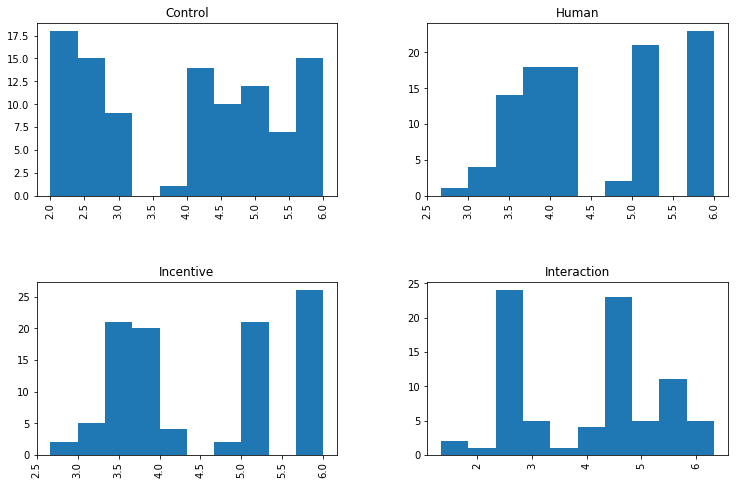

In [8]:
survey.hist('PAvg', by='Group', figsize=(12, 8))

groups = pd.unique(survey['Group'].values) 
d_data = {grp:survey['PAvg'][survey['Group'] == grp] for grp in groups} # Segmenting the data into separate groups.

Now, we can perform our Kruskal-Wallis using SciPy's built-in tools.

In [9]:
from scipy import stats

H, p = stats.kruskal(d_data['Control'], d_data['Human'], d_data['Incentive'], d_data['Interaction'])

print(H, p)

16.56030009887589 0.000870223684036526


With our p-value being less than 0.05, there is a significant difference between our various groups, indicating that the varied approaches by our call centre agents have had an impact on our customer's perception of Dilma's.

### Dunn's Test

We cannot simply use a t-test in a pairwise comparison of the Control group to the others as it adds the possibility for Type 1 error at each step. With this in mind, we can proceed with a post-hoc test to determine which approach had the best impact, in pairwise comparison with our control group.

Dunn's test is one of such post-hoc tests that we can use, as it is purposed towards non-parametric data. We will use a SciPy module aimed directly at post-hoc tests to perform it. It will return a z-score approximation to a rank sum, indicating which approach had the most impact.

In [10]:
import scikit_posthocs as sp

dunn = sp.posthoc_dunn(survey, val_col='PAvg', group_col='Group')

pd.DataFrame(dunn) # Formatted in a Dataframe for visibility.

,Control,Human,Incentive,Interaction
Control,-1.000000,0.003997,0.005532,0.795557
Human,0.003997,-1.000000,0.917122,0.002933
Incentive,0.005532,0.917122,-1.000000,0.004021
Interaction,0.795557,0.002933,0.004021,-1.000000


We can plot this on a significance plot in order to visualise the significant relationships between groups.

(<matplotlib.axes._subplots.AxesSubplot at 0x116c95438>,
 <matplotlib.colorbar.ColorbarBase at 0x116d057b8>)

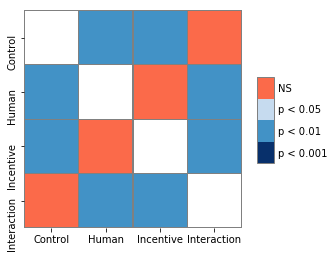

In [11]:
cmap = ['1', '#fb6a4a',  '#08306b',  '#4292c6', '#c6dbef'] # Use custom colours for visual acuity.
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 
                'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(dunn, **heatmap_args)

Given the above comparisons, it is clear that both the Human and Incentive groups are effective at improving customer perception of Dilma's Socks. Interestingly, the customers who were subjected to both had a lower perception of the company than customers who had only one of the two treatments.

There is a slight edge to the Human-oriented trained group to the Incentivised group. Considering the cost difference between the two approaches, it is debatable as to whether the Human-oriented training is worth the added expense.

## Which approach (or combination) had the most positive impact on a customer’s comprehension of Dilma's Socks' products and services?

In our survey data, questions 10 and 11 dealt with comprehension of Dilma's socks by asking specific questions about their product. For the purposes of our investigation, we will convert the survey results as currently listed in the columns into a simple 1 for a correct response, and 0 for an incorrect response in new columns entitled Comp1 and Comp2 respectively.

In [12]:
survey.loc[survey['Q10'] == 'Organic', 'Comp1'] = 1
survey.loc[survey['Q11'] == 'Socks that change colour so you never wear mismatched socks again', 'Comp2'] = 1

survey['Comp1'].fillna(0, inplace = True) # Replace NaN values with 0 for calculation purposes.
survey['Comp2'].fillna(0, inplace = True)

We can then take the mean of the two columns to create a "Comprehension Average" column that will rate comprehension as 0 for not responding correctly to either question, 0.5 for responding correctly to one of them, and 1 for both.

In [13]:
survey['CompAvg'] = (survey['Comp1'] + survey['Comp2'])/2

Before we do any statistical tests, let's observe if there is any mean variation between the listed columns.

In [14]:
survey.groupby('Group').mean()[['Comp1', 'Comp2', 'CompAvg']]

,Comp1,Comp2,CompAvg
Group,,,
Control,0.485149,0.128713,0.306931
Human,0.554455,0.108911,0.331683
Incentive,0.564356,0.099010,0.331683
Interaction,0.469136,0.123457,0.296296


We can plot our CompAvg means on a bar chart to visualise the variation.

<BarContainer object of 4 artists>

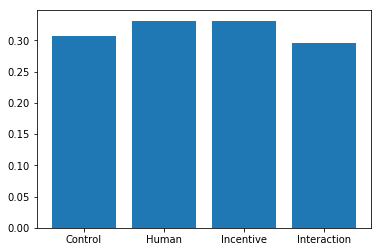

In [15]:
from matplotlib import pyplot

survey['Group'].unique()

pyplot.bar(['Control', 'Human', 'Incentive', 'Interaction'], survey.groupby('Group').mean()['CompAvg'])

There does not appear to be any great difference between each group, but the Human and Incentive appear to be slightly positively influenced. 

### Chi-Squared Test

To determine which group had the greatest significant difference from the control group, we can use a Chi-Squared test for independence. This test is used in binomial distributions of two outcomes and operates by comparing our observed data under treatment to our expected data without treatment.

In this case, our treatment groups of Human, Incentive, and Interaction will be compared to our expected results in the Control group. 

We can use SciPy once again to complete the test.

In [16]:
# Start by segmenting the data into equally proportioned groups for our observed outcomes.

YCGroups = [(survey.loc[survey['Group'] == 'Human', 'CompAvg'].sum()/101) * 100,
            (survey.loc[survey['Group'] == 'Incentive', 'CompAvg'].sum()/101) * 100,
            (survey.loc[survey['Group'] == 'Interaction', 'CompAvg'].sum()/81)* 100] # This is for correct answers.

NCGroups = [(100 - i) for i in YCGroups] # This is for incorrect answers.

# We do the same thing for our expected outcomes in our control group.

YCExpected = (survey.loc[survey['Group'] == 'Control', 'CompAvg'].sum()/101) * 100
NCExpected = 100 - YCExpected

# We then create the matrices that we will perform our Chi-Squared test on.

CObservedMatrix = [YCGroups, NCGroups]
CExpectedMatrix = [[YCExpected, YCExpected, YCExpected], [NCExpected, NCExpected, NCExpected]]

print(stats.chisquare(CObservedMatrix, CExpectedMatrix))

Power_divergenceResult(statistic=array([0.28801843, 0.28801843, 0.05316291]), pvalue=array([0.59149317, 0.59149317, 0.81764823]))


We computed p values of 0.59, 0.59, and 0.81, all failing to reject the null hypothesis at p < 0.05.

This indicates that there was no significant difference between the Human-oriented, Incentivised, or Interaction groups and the control.

To be certain that there was no influence whatsoever, we can perform the same test on Comp1 and Comp2 separately. 

In [17]:
YC1Groups = [(survey.loc[survey['Group'] == 'Human', 'Comp1'].sum()/101) * 100,
            (survey.loc[survey['Group'] == 'Incentive', 'Comp1'].sum()/101) * 100,
            (survey.loc[survey['Group'] == 'Interaction', 'Comp1'].sum()/81)* 100]

NC1Groups = [(100 - i) for i in YC1Groups]


YC1Expected = (survey.loc[survey['Group'] == 'Control', 'Comp1'].sum()/101) * 100
NC1Expected = 100 - YC1Expected

C1ObservedMatrix = [YC1Groups, NC1Groups]
C1ExpectedMatrix = [[YC1Expected, YC1Expected, YC1Expected], [NC1Expected, NC1Expected, NC1Expected]]

print(stats.chisquare(C1ObservedMatrix, C1ExpectedMatrix))

Power_divergenceResult(statistic=array([1.92307692, 2.51177394, 0.10265335]), pvalue=array([0.16551786, 0.11299867, 0.74866845]))


In [18]:
YC2Groups = [(survey.loc[survey['Group'] == 'Human', 'Comp2'].sum()/101) * 100,
            (survey.loc[survey['Group'] == 'Incentive', 'Comp2'].sum()/101) * 100,
            (survey.loc[survey['Group'] == 'Interaction', 'Comp2'].sum()/81)* 100]

NC2Groups = [(100 - i) for i in YC2Groups]

YC2Expected = (survey.loc[survey['Group'] == 'Control', 'Comp2'].sum()/101) * 100
NC2Expected = 100 - YC2Expected

C2ObservedMatrix = [YC2Groups, NC2Groups]
C2ExpectedMatrix = [[YC2Expected, YC2Expected, YC2Expected], [NC2Expected, NC2Expected, NC2Expected]]

print(stats.chisquare(C2ObservedMatrix, C2ExpectedMatrix))

Power_divergenceResult(statistic=array([0.34965035, 0.78671329, 0.02463434]), pvalue=array([0.55431113, 0.37509581, 0.87528166]))


These two results corroborate our initial assessment, and therefore we can conclude that there is no influence on the comprehension of Dilma's products based on the call centre group.

## Which method (or combination) had the highest likelihood of customers recommending DS to their friends?

Answering this is particularly straightforward, given that there is a binomial survey question prompting the customer to reply "Yes" or "No", Q8.

As we previously described in the comprehension question, we interpret binomial data through Chi-Squared tests, and in this case, it's no different.

Fortunately, we've already converted column Q8 into a binomial 1 or 0. We will use the same procedure to compute our Chi-Squared results.

We can observe the means of our relevant columns once again.

In [19]:
survey.groupby('Group').mean()[['Q8']]

,Q8
Group,
Control,0.435644
Human,0.633663
Incentive,0.722772
Interaction,0.580247


All three groups appear to have been positively influenced the likelihood of whether a customer would recommend Dilma's to a friend. The Incentive based approach appears to have been most effective, followed by the Human group, and then the Interaction group.

We will verify this with Chi-Squared.

In [20]:
YQ8Groups = [(survey.loc[survey['Group'] == 'Human', 'Q8'].sum()/101) * 100,
            (survey.loc[survey['Group'] == 'Incentive', 'Q8'].sum()/101) * 100,
            (survey.loc[survey['Group'] == 'Interaction', 'Q8'].sum()/81)* 100]

NQ8Groups = [(100 - i) for i in YQ8Groups]

YExpected = (survey.loc[survey['Group'] == 'Control', 'Q8'].sum()/101) * 100
NExpected = 100 - YExpected

ObservedMatrix = [YQ8Groups, NQ8Groups]
ExpectedMatrix = [[YExpected, YExpected, YExpected], [NExpected, NExpected, NExpected]]

print(stats.chisquare(ObservedMatrix, ExpectedMatrix))

Power_divergenceResult(statistic=array([15.94896332, 33.53269537,  8.50495303]), pvalue=array([6.50734073e-05, 7.00760614e-09, 3.54181055e-03]))


With the p values all comfortably below 0.05, the Chi statistic shows us that the most effective treatment was the Incentive based approach, followed by the Human, and the Interaction. This corroborates our results as we saw them with various means. We can visualise this with a significance plot.

## Concluding Remarks

Through our investigation, we deduced with statistical significance three conclusions.

1. Human-oriented training most improved customer perception of Dilma's, followed very closely by Incenvisation.
2. There were no significant differences between both or either call centre approaches on customer comprehension.
3. Incentivisation was the most likely approach to lead to a recommendation to a friend.

Given the above factors, it is suggested that Dilma's Socks implements an **incentivised-based approach** as opposed to human-oriented training approach. The benefits to using the human-oriented approach over the Incentivised approach are very slight in terms of customer perception and offer marked advantages in the likelihood of a recommendation. There was no advantage to using both methods in conjunction.

Here is an abridged version of our data after processing.

In [21]:
relevantcols = ['Q5', 'Q6', 'Q7', 'PAvg', 'Q8', 'Comp1', 'Comp2', 'CompAvg']
survey[relevantcols].head()

,Q5,Q6,Q7,PAvg,Q8,Comp1,Comp2,CompAvg
0,5,5,5,5.000000,1,0.0,0.0,0.0
1,5,5,5,5.000000,0,0.0,0.0,0.0
2,3,4,4,3.666667,0,1.0,0.0,0.5
3,3,2,2,2.333333,1,0.0,0.0,0.0
4,4,4,3,3.666667,0,0.0,0.0,0.0
